In [31]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

### Steps for Logistic Regression
#### Data Exploration (no missing values, descriptive statistics, etc...)
#### Examining plausible Gaussian Distribution -> with descriptives (AKA Histograms)
#### Correlation Matrix
#### Feature Engineering (scaling 0-1, split -> training and test)
#### Model Creation (LReg) and Performance Metric-based evaluation (F1, accuracy, etc...)
#### Hyperparameter Tunning and ROC curve

In [3]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",")

In [4]:
df = read_file("/Users/guillermocomesanacimadevila/Diabetes_project/Data/Diabetes.csv")

In [5]:
df.shape

(768, 9)

In [6]:
df.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
# check for na
df.isna().sum() # all good

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# logistic regression
# independent variables -> blood pressure, glucose, BMI
# dependent variables -> diabetes (yes/no)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [14]:
# need to get rid of the 0s
# median instead
for col in cols:
    median_val = df[df[col] != 0] [col].median()
    df[col] = df[col].replace(0, median_val)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1000x600 with 0 Axes>

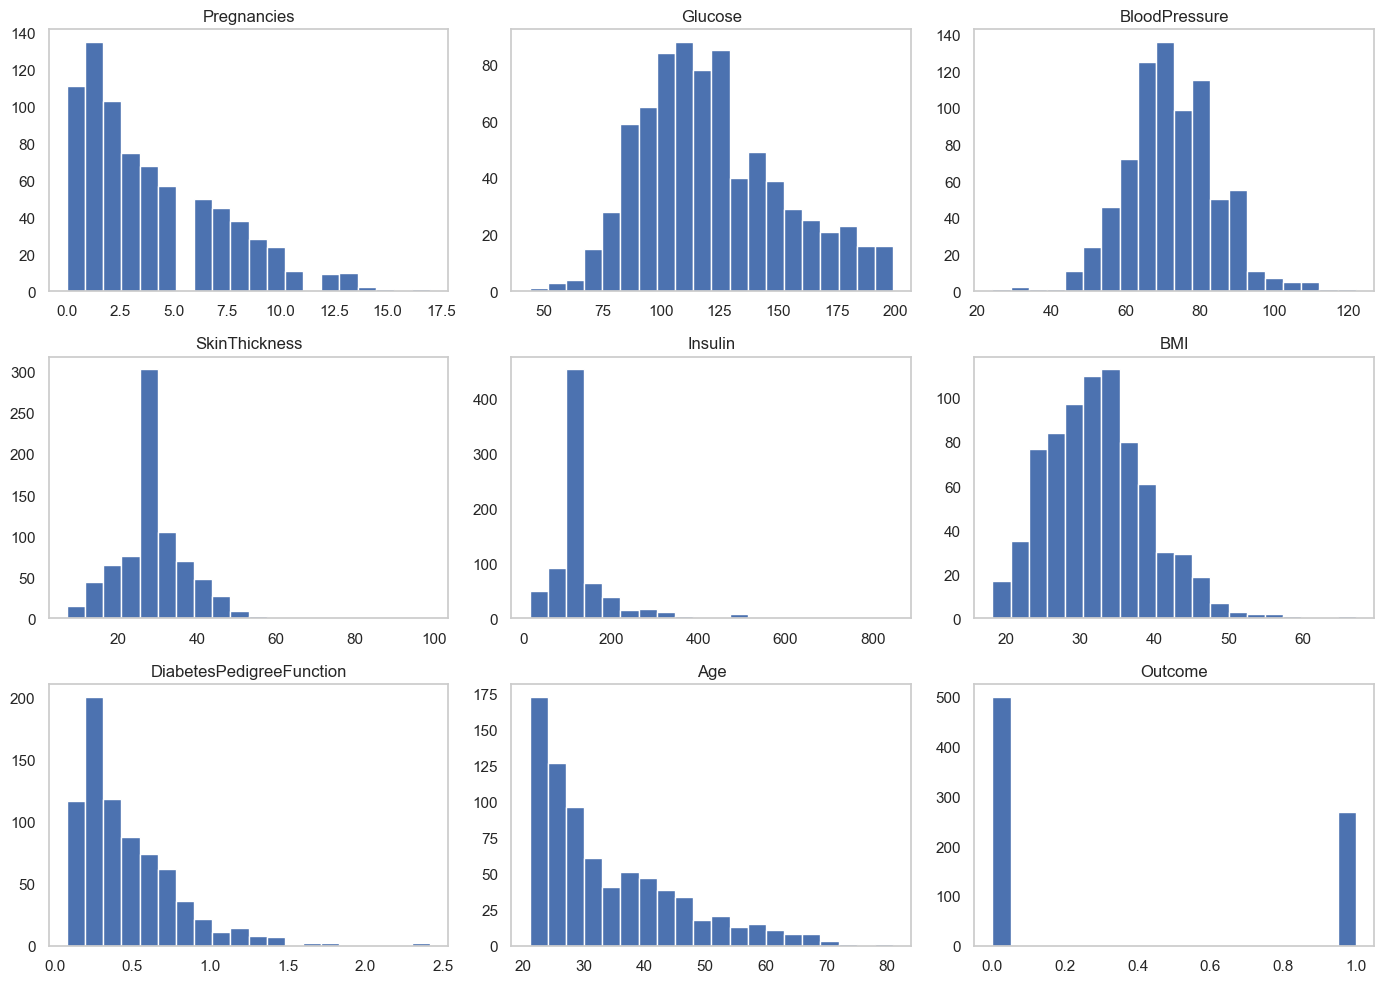

In [20]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

df.hist(bins=20, figsize=(14, 10), grid=False)
plt.tight_layout()
plt.show()

In [22]:
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


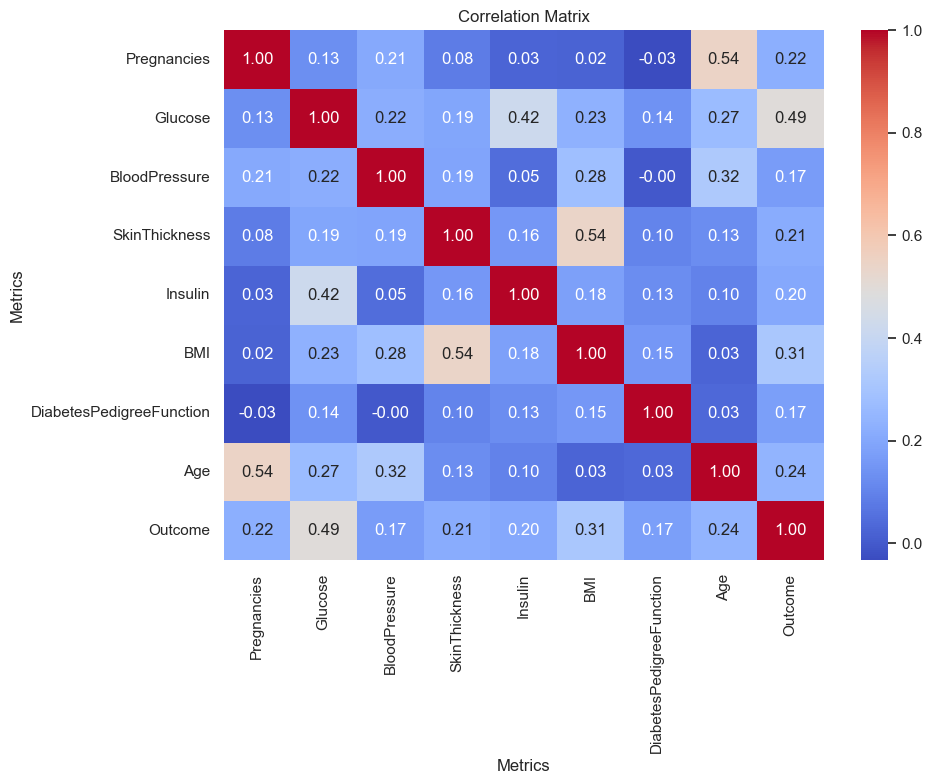

In [27]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel("Metrics")
plt.ylabel("Metrics")
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
X = df.drop("Outcome", axis=1) # REMAINING CLASSES
y = df["Outcome"] # scaled (YES/NO) - DIABETES

In [34]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,66,29,125,26.6,0.351,31
2,8,183,64,29,125,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,125,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,29,125,30.1,0.349,47


In [35]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [40]:
X_train

array([[-0.54791859, -1.2379406 , -0.03198993, ..., -0.02258989,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.31744701,  0.79522451, ..., -0.61932681,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.57017181, -2.18274749, ..., -0.54655402,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.67906949,  1.12611029, ...,  1.91316648,
         2.00573238,  0.40494237],
       [-1.14185152,  0.63592135, -0.03198993, ...,  1.44742059,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.10992502,  1.95332473, ..., -1.44893669,
        -0.63385134, -1.04154944]])

In [41]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [42]:
print(f"X_train shape: {X_train.shape}")

X_train shape: (614, 8)


In [43]:
print(f"X_test shape: {X_test.shape}")

X_test shape: (154, 8)


In [44]:
print(f"y_train shape: {y_train.shape}")

y_train shape: (614,)


In [45]:
print(f"y_test shape: {y_test.shape}")

y_test shape: (154,)


In [46]:
# Create model
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [48]:
y_pred # classification

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [50]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7532467532467533

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [52]:
conf_matrix

array([[82, 17],
       [21, 34]])

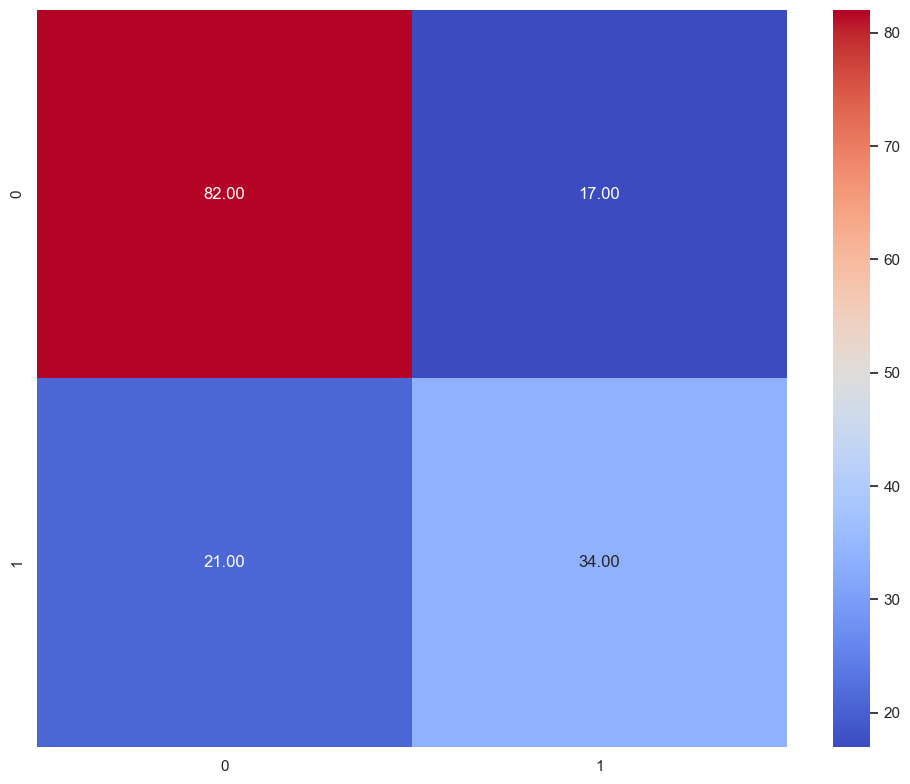

In [53]:
plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

In [59]:
class_report = pd.DataFrame(classification_report(y_pred, y_test, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.828283,0.618182,0.753247,0.723232,0.758704
recall,0.796117,0.666667,0.753247,0.731392,0.753247
f1-score,0.811881,0.641509,0.753247,0.726695,0.755459
support,103.000000,51.000000,0.753247,154.000000,154.000000


In [ ]:
# Hyperparameter tuning to see if we can adjust and increase performance 
# C and penalty